In [ ]:
import pandas as pd
from sklearn import datasets as ds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 原始資料

In [ ]:
myData = pd.read_csv("/content/drive/MyDrive/資料探勘/heart.csv")
for i in myData:
  print(myData[i].unique())
myData

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 22

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# 清除 NAN列

In [ ]:
myData = pd.read_csv("/content/drive/MyDrive/資料探勘/heart.csv")
myData.info()
myData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
myData.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# 轉換成數值型資料

In [ ]:
# 從sklearn中導入Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# 直接覆蓋age欄位呈現轉換後的結果
myData['Sex'] = label_encoder.fit_transform(myData['Sex'])
myData['ChestPainType'] = label_encoder.fit_transform(myData['ChestPainType'])
myData['RestingECG'] = label_encoder.fit_transform(myData['RestingECG'])
myData['ExerciseAngina'] = label_encoder.fit_transform(myData['ExerciseAngina'])
myData['ST_Slope'] = label_encoder.fit_transform(myData['ST_Slope'])
myData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# 資料視覺化

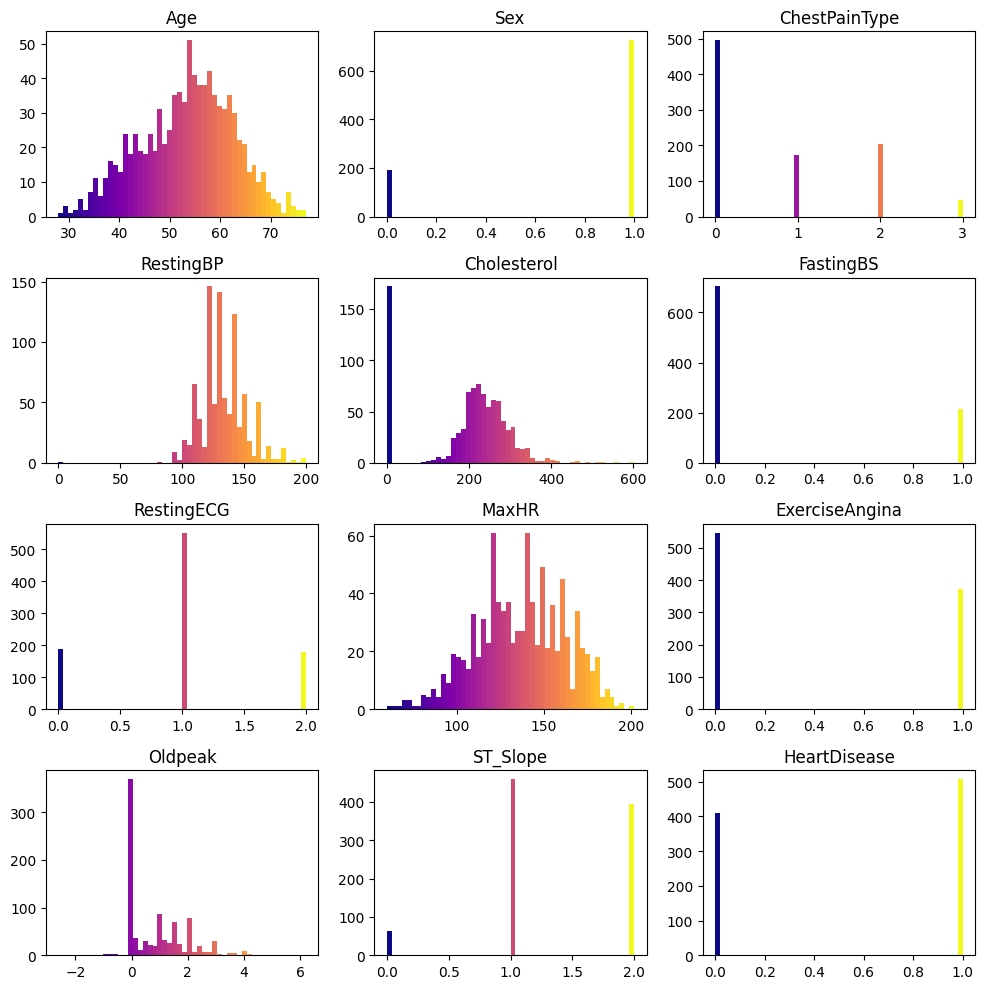

In [ ]:
from matplotlib import pyplot as plt
# 創建一個圖形對象和軸對象的矩陣
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

# 定義漸層顏色
cmap = plt.get_cmap('plasma') #magma、plasma


# 對每個子圖應用直方圖
for i, ax in enumerate(axes.flatten()):
    column = myData.columns[i]
    n, bins, patches = ax.hist(myData[column], bins=50, edgecolor='black')

    # 將漸層顏色應用到每個直方圖的條形
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = (bin_centers - min(bin_centers)) / (max(bin_centers) - min(bin_centers))
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cmap(c))
        p.set_edgecolor('none')  # 移除邊框顏色

    ax.set_title(f'{column}')

# 顯示圖表
plt.tight_layout()
plt.show()

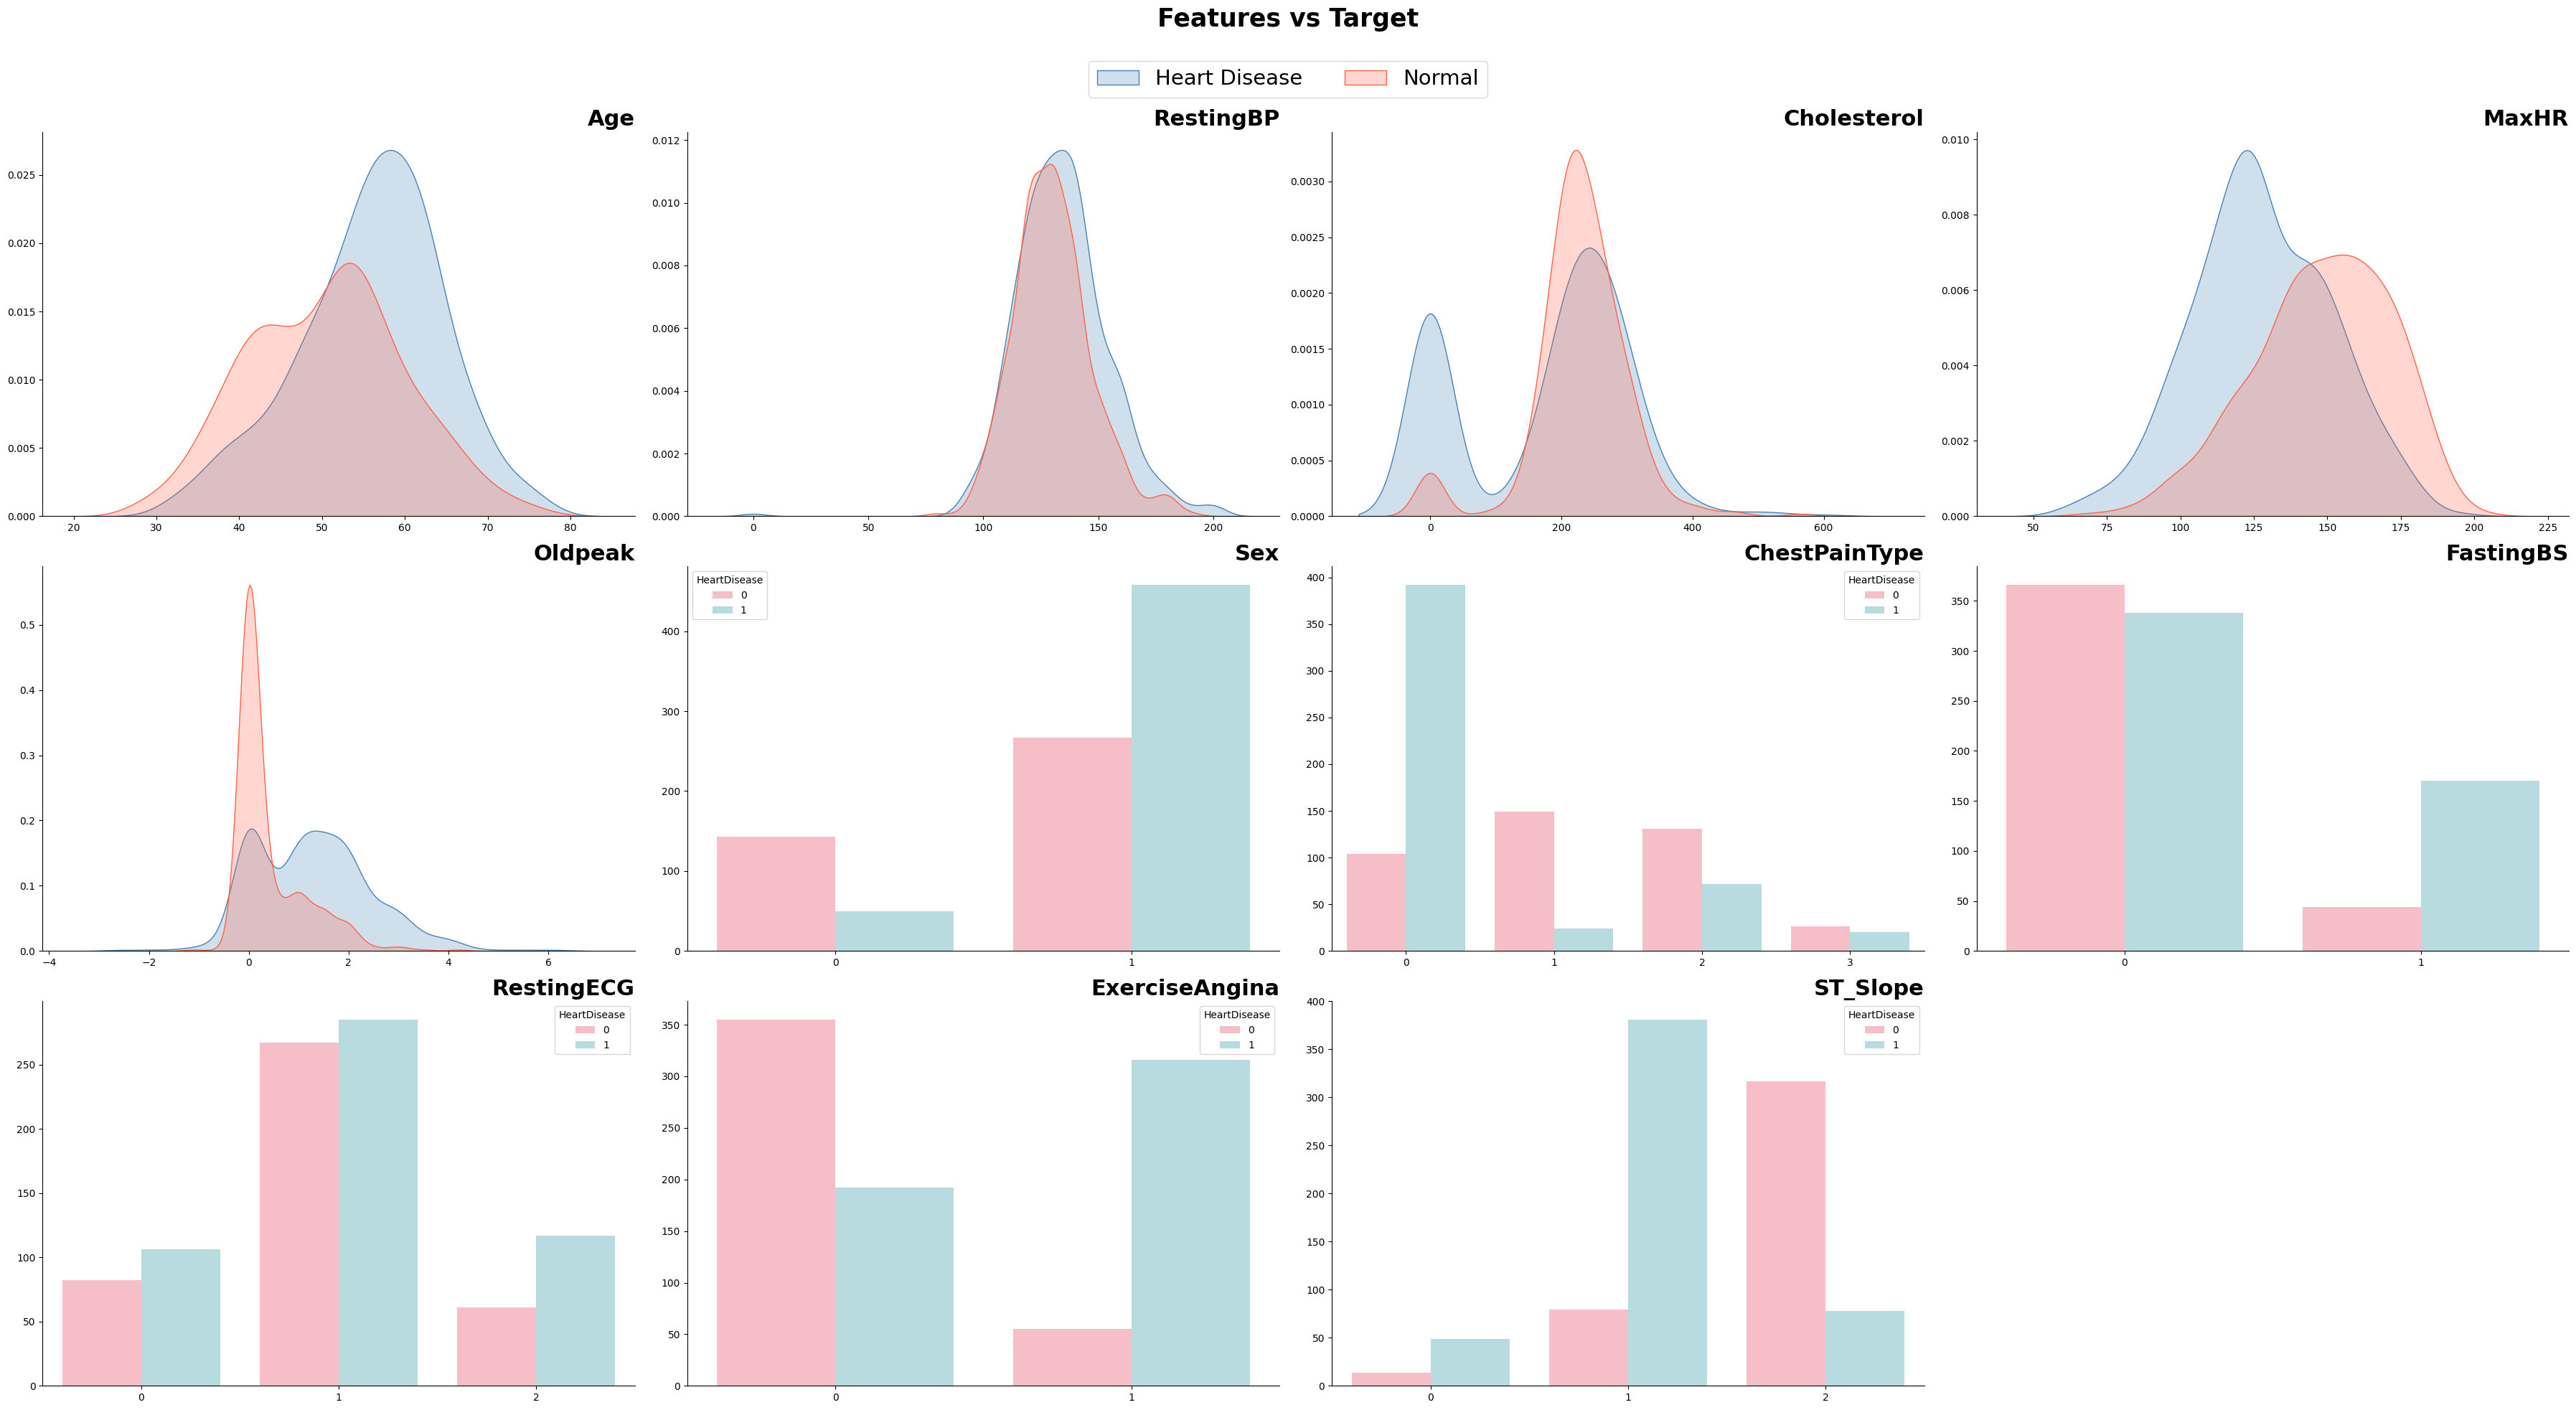

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 選取連續型資料和不連續型資料欄位
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# 設置圖表大小
figsize = (36, 20)  # 調整大小以適應更多子圖
fig = plt.figure(figsize=figsize)

# 繪製連續型資料的KDE圖
for idx, col in enumerate(continuous_features, start=1):
    ax = plt.subplot(3, 4, idx)
    sns.kdeplot(data=myData, hue='HeartDisease', fill=True, x=col, legend=False, palette=['#FF6347', '#4682B4'])
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=22)

# 繪製不連續型資料的條形圖
for idx, col in enumerate(categorical_features, start=len(continuous_features) + 1):
    ax = plt.subplot(3, 4, idx)
    sns.countplot(data=myData, x=col, hue='HeartDisease', palette=['#FFB6C1', '#B0E0E6'])
    ax.set_ylabel('')
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=22)
    if idx % 4 == 0:
        ax.legend([],[], frameon=False)  # 移除多餘的圖例

# 設置圖表標題和圖例
fig.suptitle(f'Features vs Target\n\n\n', ha='center', fontweight='bold', fontsize=25)
fig.legend(['Heart Disease', 'Normal'], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()


# 查看離群值並刪除

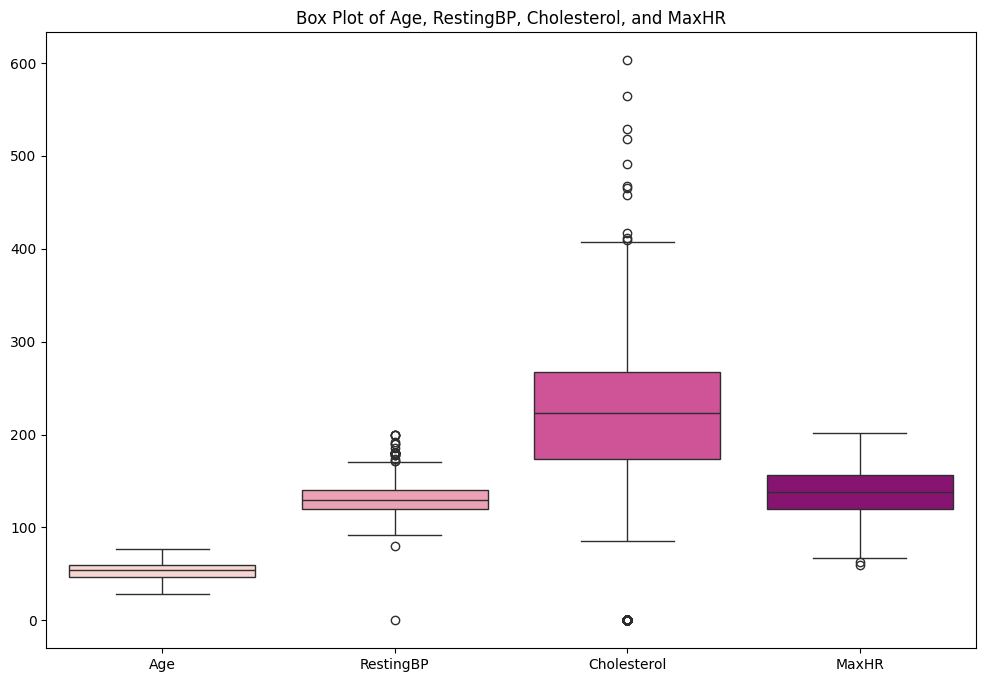

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=myData[['Age', 'RestingBP', 'Cholesterol','MaxHR']], palette="RdPu")
plt.title('Box Plot of Age, RestingBP, Cholesterol, and MaxHR')
plt.show()


In [ ]:
myData.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
# 定義一個函數來識別並移除離群值
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# 檢查每個數值型欄位並移除離群值
for column in ['Cholesterol']:
    myData = remove_outliers(myData, column)

# 顯示處理後的數據
print(myData.describe())

              Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  735.000000  735.000000     735.000000  735.000000   735.000000   
mean    52.903401    0.757823       0.843537  133.065306   241.038095   
std      9.495169    0.428693       0.958972   17.348365    51.164730   
min     28.000000    0.000000       0.000000   92.000000    85.000000   
25%     46.000000    1.000000       0.000000  120.000000   207.000000   
50%     54.000000    1.000000       1.000000  130.000000   236.000000   
75%     59.000000    1.000000       2.000000  140.000000   274.000000   
max     77.000000    1.000000       3.000000  200.000000   407.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  735.000000  735.000000  735.000000      735.000000  735.000000   
mean     0.164626    0.934694  140.277551        0.386395    0.905170   
std      0.371095    0.633817   24.499218        0.487254    1.077337   
min      0.000000    0.000000   71.000000        0

In [ ]:
#myData.loc[myData['Cholesterol'] == 0, 'Cholesterol'] = 195

# 熱力圖

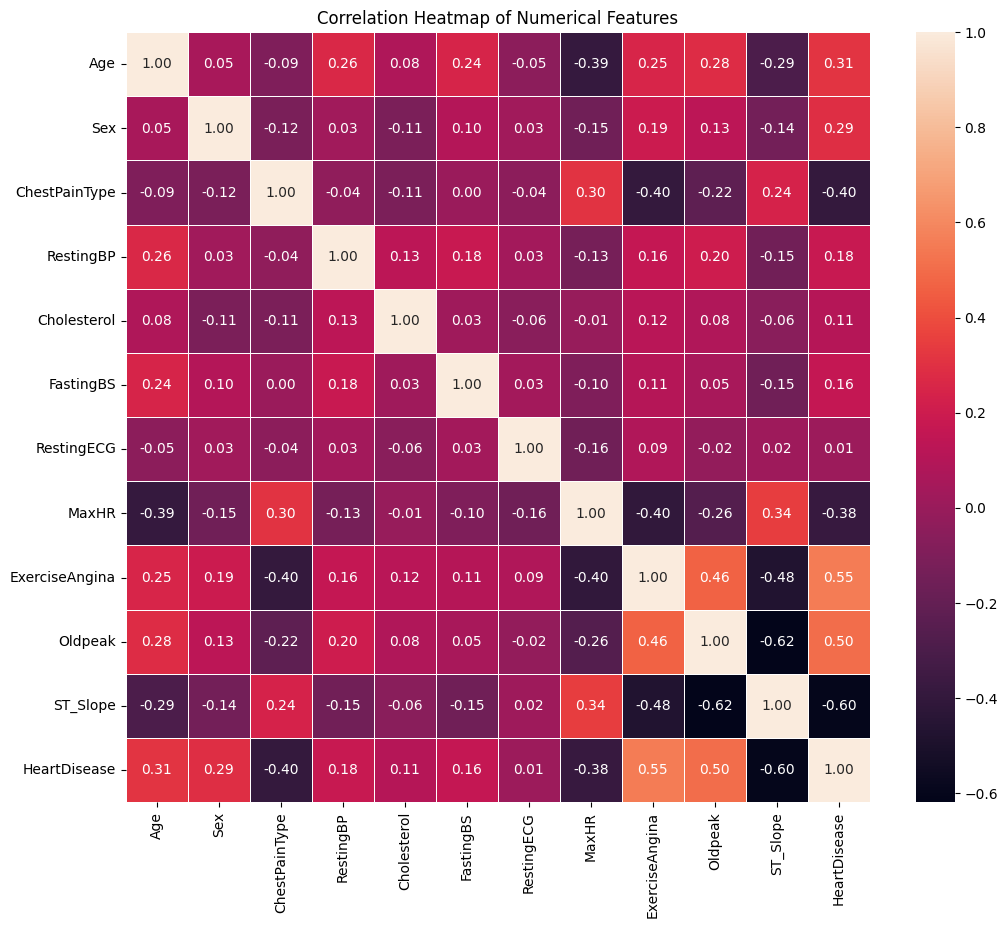

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
# Calculate correlation matrix
corr_matrix = myData.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5) #cmap='coolwarm'
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 特徵選取 P value

In [ ]:
x = myData.drop(['HeartDisease'],axis=1)
y = myData['HeartDisease']

In [ ]:
from sklearn import feature_selection as fs
skb = fs.SelectKBest(fs.f_classif, k=5) #從此特徵執中選取K個最好的特徵值
skb.fit(x,y)
print(skb.pvalues_)
skb.fit_transform(x,y)

[4.31012494e-18 8.23636427e-16 5.59817836e-29 1.71945304e-06
 3.84881940e-03 7.45738033e-06 8.28844324e-01 4.13355298e-27
 5.54301629e-60 4.03560326e-48 2.43393737e-73]


array([[  1. , 172. ,   0. ,   0. ,   2. ],
       [  2. , 156. ,   0. ,   1. ,   1. ],
       [  1. ,  98. ,   0. ,   0. ,   2. ],
       ...,
       [  0. , 115. ,   1. ,   1.2,   1. ],
       [  1. , 174. ,   0. ,   0. ,   1. ],
       [  2. , 173. ,   0. ,   0. ,   2. ]])

In [ ]:
print(myData)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

# 建構模型

In [ ]:
from sklearn import tree
tc = tree.DecisionTreeClassifier()
tc.fit(x,y)
tc.feature_importances_

array([0.06556128, 0.0420787 , 0.09624675, 0.07551627, 0.08019336,
       0.01976623, 0.01960045, 0.06015281, 0.03877369, 0.06774169,
       0.43436878])

In [ ]:
from sklearn import ensemble as es
rfc = es.RandomForestClassifier(n_estimators=1000)
rfc.fit(x,y)
rfc.feature_importances_


array([0.08731229, 0.04010641, 0.11480837, 0.07281862, 0.07625774,
       0.01114024, 0.03040415, 0.10618992, 0.10317462, 0.12451563,
       0.23327201])

In [ ]:
from sklearn import decomposition as dc
pca = dc.PCA()
pca.fit(x,y)
pca.explained_variance_ratio_


array([7.26431544e-01, 1.73517274e-01, 7.99530133e-02, 1.92625529e-02,
       3.46999003e-04, 2.09181007e-04, 1.06317583e-04, 5.73539407e-05,
       4.74628253e-05, 3.56441739e-05, 3.26568908e-05])

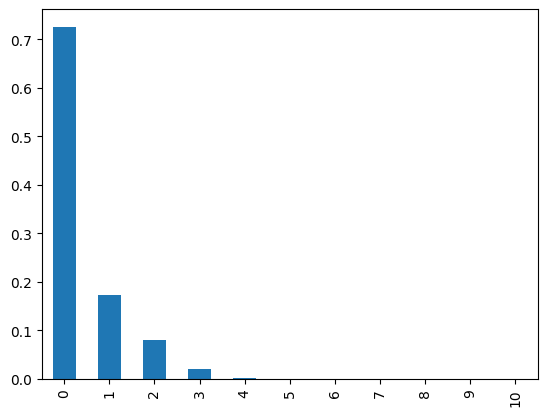

In [ ]:
scree_plot = pd.Series(pca.explained_variance_ratio_).plot.bar()

# 決策樹 DecisionTree

In [ ]:
from sklearn import datasets,model_selection,tree,metrics
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.45,random_state=42)
#x
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
#print(y_test)
#dtc.predict(x_test)
print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       167
           1       0.82      0.76      0.79       164

    accuracy                           0.80       331
   macro avg       0.80      0.80      0.80       331
weighted avg       0.80      0.80      0.80       331



array([[140,  27],
       [ 40, 124]])

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.85      0.81      0.83       164

    accuracy                           0.84       331
   macro avg       0.84      0.84      0.84       331
weighted avg       0.84      0.84      0.84       331



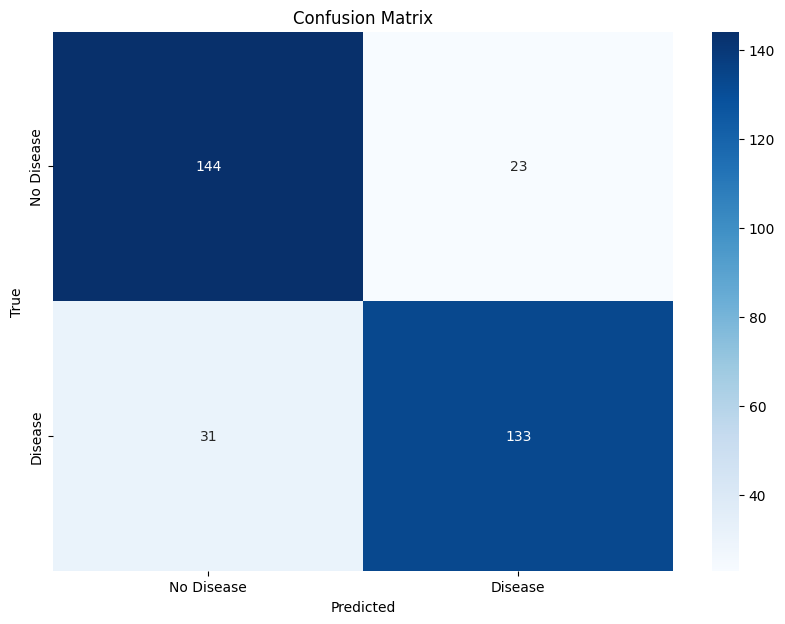

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, model_selection, tree, metrics

# 提取重要特徵
important_features = ['ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MaxHR']

x = myData[important_features]
y = myData['HeartDisease']

# 分割訓練集語測試集
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.45, random_state=42)

# 使用决策樹分類器
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# 預測及評估模型
y_pred = dtc.predict(x_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

# 繪製混淆矩陣
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
tree.export_graphviz(dtc,"my_tree.dot")

In [ ]:
!dot -Tpng my_tree.dot -o tree.png

# 隨機森林 Random Forest

In [ ]:
from sklearn import datasets, model_selection, metrics
from sklearn.ensemble import RandomForestClassifier

important_features = ['ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MaxHR']

x = myData[important_features]
y = myData['HeartDisease']

# 分割訓練集和測試集
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.45, random_state=42)

# 使用 Random Forest 分類器
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# 預測及評估模型
y_pred = rfc.predict(x_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       167
           1       0.82      0.85      0.84       164

    accuracy                           0.83       331
   macro avg       0.83      0.83      0.83       331
weighted avg       0.83      0.83      0.83       331

[[136  31]
 [ 24 140]]


# 高斯 GaussianNB

In [ ]:
from sklearn import datasets, model_selection, metrics
from sklearn.naive_bayes import GaussianNB

# 提取重要特徵
important_features = ['ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MaxHR']

x = myData[important_features]
y = myData['HeartDisease']

# 分割訓練集和測試集
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.45, random_state=42)

# 使用 Gaussian Naïve Bayes 分類器
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# 預測及評估模型
y_pred = gnb.predict(x_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       167
           1       0.85      0.85      0.85       164

    accuracy                           0.85       331
   macro avg       0.85      0.85      0.85       331
weighted avg       0.85      0.85      0.85       331

[[143  24]
 [ 24 140]]


# ANN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 提取重要特徵
important_features = ['ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MaxHR']


x = myData[important_features]
y = myData['HeartDisease']

# 分割訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)

# 數據標準化
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 創建ANN模型
model = Sequential()
model.add(Dense(16, input_dim=len(important_features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

# 預測並評估模型
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Epoch 1/100
41/41 [==============================] - 2s 4ms/step - loss: 0.8103 - accuracy: 0.4629
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6337
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7946
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.8193
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.8218
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8243
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4168 - accuracy: 0.8193
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4079 - accuracy: 0.8292
Epoch 9/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8292
Epoch 10/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.8317
Epoch 11/

# 繪製四個模型的ROC曲線

Epoch 1/100
41/41 [==============================] - 4s 10ms/step - loss: 0.6607 - accuracy: 0.5446
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.5872 - accuracy: 0.7673
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 0.5254 - accuracy: 0.7847
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.8218
Epoch 5/100
41/41 [==============================] - 0s 6ms/step - loss: 0.4391 - accuracy: 0.8391
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4145 - accuracy: 0.8465
Epoch 7/100
41/41 [==============================] - 0s 6ms/step - loss: 0.4006 - accuracy: 0.8465
Epoch 8/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3933 - accuracy: 0.8515
Epoch 9/100
41/41 [==============================] - 0s 6ms/step - loss: 0.3879 - accuracy: 0.8490
Epoch 10/100
41/41 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.8490
Epoch 11

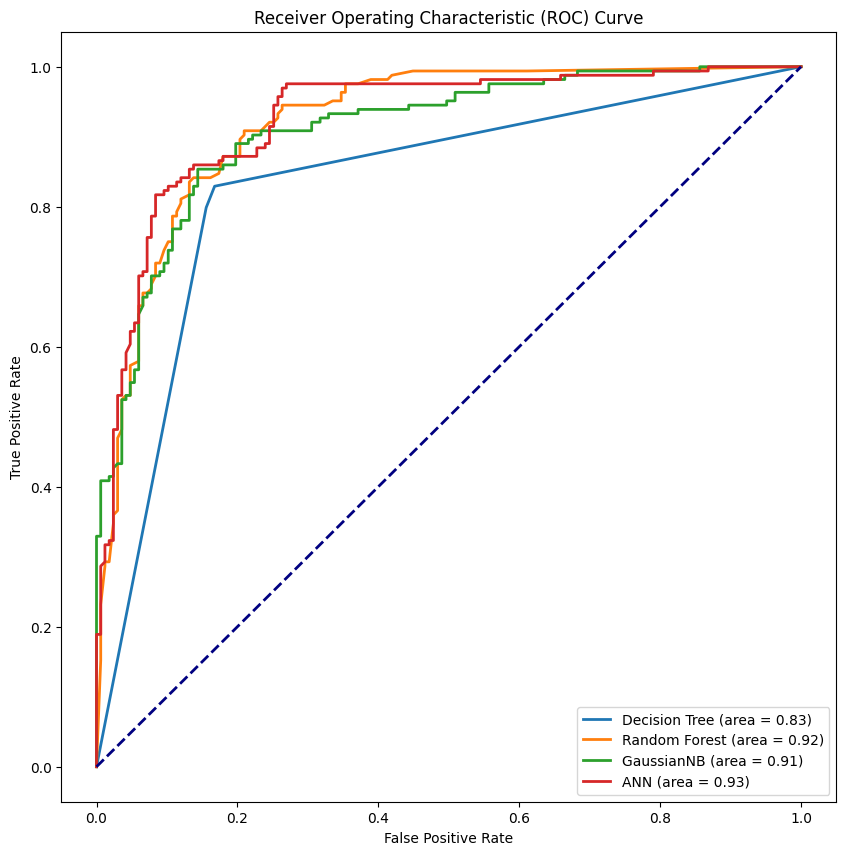

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


# 提取重要特徵
important_features = ['ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MaxHR']

x = myData[important_features]
y = myData['HeartDisease']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=42)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 初始化字典以儲存所有结果
results = {}

# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_proba_dtc = dtc.predict_proba(x_test)[:, 1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_pred_proba_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
results['Decision Tree'] = (fpr_dtc, tpr_dtc, roc_auc_dtc)

# Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_proba_rfc = rfc.predict_proba(x_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
results['Random Forest'] = (fpr_rfc, tpr_rfc, roc_auc_rfc)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_proba_gnb = gnb.predict_proba(x_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
results['GaussianNB'] = (fpr_gnb, tpr_gnb, roc_auc_gnb)

# ANN
model = Sequential()
model.add(Dense(16, input_dim=len(important_features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)
y_pred_proba_ann = model.predict(x_test).ravel()
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_proba_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
results['ANN'] = (fpr_ann, tpr_ann, roc_auc_ann)

# 繪製ROC曲線
plt.figure(figsize=(10, 10))
lw = 2

# Plot ROC curves for each classifier
for model_name, (fpr, tpr, roc_auc) in results.items():
    plt.plot(fpr, tpr, lw=lw, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()
